In [335]:
import numpy as np
import pandas as pd

In [336]:
data = pd.read_csv("C:/Users/ayush/Downloads/NYC-Airbnb-2023.csv/NYC-Airbnb-2023.csv")
#data.dropna(inplace=True)
data.shape
#print(data)
data.columns
shuffled_data = data.sample(frac=1, random_state=42).reset_index(drop=True)

C:\Users\ayush\AppData\Local\Temp\ipykernel_10952\3963923037.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/ayush/Downloads/NYC-Airbnb-2023.csv/NYC-Airbnb-2023.csv")


In [337]:
from scipy.stats import zscore

z_scores = zscore(data[['price']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_no_outliers = data[filtered_entries]

Q1 = df_no_outliers['price'].quantile(0.25)
Q3 = df_no_outliers['price'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df_no_outliers[~((df_no_outliers['price'] < (Q1 - 1.5 * IQR)) | (df_no_outliers['price'] > (Q3 + 1.5 * IQR)))]

In [338]:
data_req=df_no_outliers
#data_req_2=data[['neighbourhood_group','neighbourhood','room_type','price','minimum_nights']]
data_req.shape

(39638, 18)

In [339]:
data_req.columns
data_req.dtypes
data_req.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN


In [340]:
C1=data_req.drop("price",axis=1)
C2=data_req["price"]
print(C1.shape)
print(C2.shape)

correlation_matrix = C1.corrwith(C2)

top9_correlations = correlation_matrix.abs().sort_values(ascending=False).head(9)

top9_df = pd.DataFrame({'variable': top9_correlations.index, 'corr_score': top9_correlations.values})
print(top9_df)

(39638, 17)
(39638,)
                         variable  corr_score
0                       longitude    0.240760
1                  minimum_nights    0.093471
2                              id    0.088602
3  calculated_host_listings_count    0.075157
4                availability_365    0.074112
5               reviews_per_month    0.037126
6           number_of_reviews_ltm    0.026832
7                        latitude    0.025522
8                         host_id    0.017930


C:\Users\ayush\AppData\Local\Temp\ipykernel_10952\3527112905.py:6: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = C1.corrwith(C2)


In [341]:
X=data_req[['availability_365','calculated_host_listings_count','neighbourhood_group','neighbourhood','room_type','price','number_of_reviews_ltm',
        'number_of_reviews','minimum_nights']]
X.dtypes

availability_365                   int64
calculated_host_listings_count     int64
neighbourhood_group               object
neighbourhood                     object
room_type                         object
price                              int64
number_of_reviews_ltm              int64
number_of_reviews                  int64
minimum_nights                     int64
dtype: object

In [342]:
X.head()

,availability_365,calculated_host_listings_count,neighbourhood_group,neighbourhood,room_type,price,number_of_reviews_ltm,number_of_reviews,minimum_nights
0,314,3,Manhattan,Midtown,Entire home/apt,150,1,49,30
1,365,2,Brooklyn,Bedford-Stuyvesant,Private room,60,0,50,30
2,0,1,Manhattan,Upper West Side,Private room,75,0,118,2
3,106,1,Manhattan,Midtown,Private room,68,52,575,2
4,181,1,Brooklyn,Sunset Park,Entire home/apt,275,1,3,60


In [343]:
null_counts = X.isnull().sum()

# Print the number of null values for each column
print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
availability_365                  0
calculated_host_listings_count    0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
number_of_reviews_ltm             0
number_of_reviews                 0
minimum_nights                    0
dtype: int64


In [225]:
## Calculate the lower and upper bounds for excluding outliers
#lower_bound = X['price'].quantile(0.01)
#upper_bound = X['price'].quantile(0.99)
#
## Exclude values outside the bounds
#filtered_data = X[
#    (X['price'] >= lower_bound) &
#    (X['price'] <= upper_bound)
#]
#X = X[X[['price']] != 0]
#X.head()
##X.replace('NaN', np.nan, inplace=True)
##X.dropna(inplace=True)

,availability_365,calculated_host_listings_count,neighbourhood_group,neighbourhood,room_type,price,number_of_reviews_ltm,number_of_reviews,minimum_nights
0,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,75.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,68.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,275.0,NaN,NaN,NaN


In [344]:
X.shape
X.head()

,availability_365,calculated_host_listings_count,neighbourhood_group,neighbourhood,room_type,price,number_of_reviews_ltm,number_of_reviews,minimum_nights
0,314,3,Manhattan,Midtown,Entire home/apt,150,1,49,30
1,365,2,Brooklyn,Bedford-Stuyvesant,Private room,60,0,50,30
2,0,1,Manhattan,Upper West Side,Private room,75,0,118,2
3,106,1,Manhattan,Midtown,Private room,68,52,575,2
4,181,1,Brooklyn,Sunset Park,Entire home/apt,275,1,3,60


In [345]:
y=X[["price"]]
X=X.drop("price",axis=1)

In [346]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns=['minimum_nights','availability_365','calculated_host_listings_count','number_of_reviews_ltm','number_of_reviews']

X_encoded = pd.get_dummies(X, columns=['neighbourhood_group', 'neighbourhood', 'room_type'], drop_first=True)
X_encoded[numeric_columns]=scaler.fit_transform(X_encoded[numeric_columns])
X_normalized_df = pd.DataFrame(X_encoded, columns=X_encoded.columns)
y['price'].max()

387

In [347]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.1, random_state=42)
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')
r2 = r2_score(y_test, predictions)
print(f'R2 Score: {r2}')
#print(f'Mean Squared Error: {mse}')

c:\Users\ayush\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Root Mean Squared Error (RMSE): 54.68678329052317
R2 Score: 0.5580922098463649


In [348]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train, X_test, y_train, and y_test are already defined

# Create a RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
print(f'Random Forest Root Mean Squared Error (RMSE): {rf_rmse}')

rf_r2 = r2_score(y_test, rf_predictions)
print(f'Random Forest R2 Score: {rf_r2}')

C:\Users\ayush\AppData\Local\Temp\ipykernel_10952\510773329.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Random Forest Root Mean Squared Error (RMSE): 55.62441591104313
Random Forest R2 Score: 0.5428088367823336


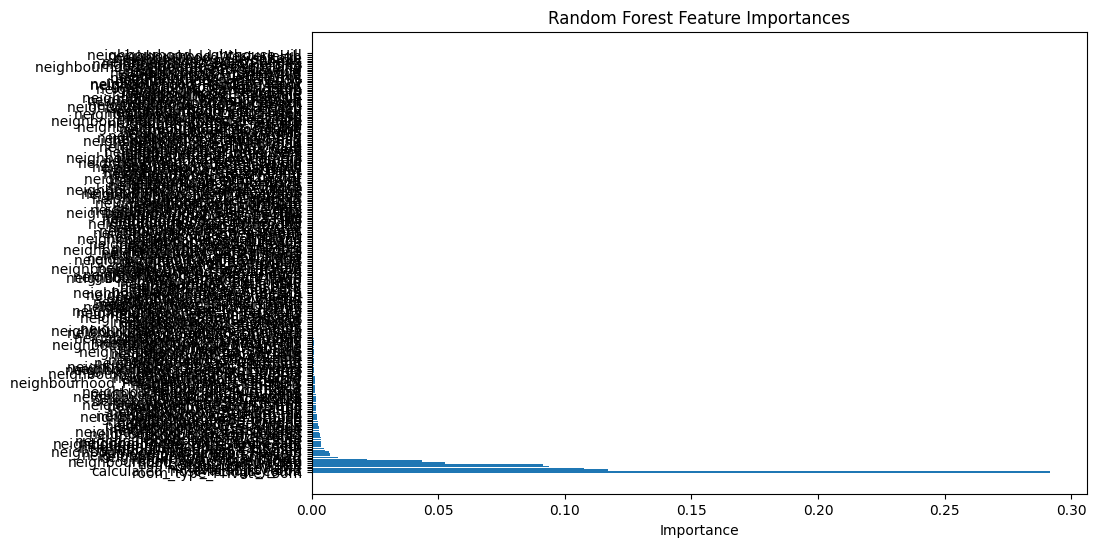

In [349]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
rf_feature_importances = rf_model.feature_importances_

# Create a DataFrame to associate feature names with their importances
rf_feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_feature_importances})

# Sort the DataFrame by importance
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances for the Random Forest
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance_df['Feature'], rf_feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

In [354]:
data_taxi = pd.read_csv("C:/Users/ayush/Downloads/2017_Yellow_Taxi_Trip_Data.csv/2017_Yellow_Taxi_Trip_Data.csv")
#data.dropna(inplace=True)
data_taxi.shape
#print(data)
data_taxi.columns
#shuffled_data = data.sample(frac=1, random_state=42).reset_index(drop=True)

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [355]:
data_taxi['tpep_dropoff_datetime'].dtypes

dtype('O')

In [356]:
data_taxi['tpep_pickup_datetime'] = pd.to_datetime(data_taxi['tpep_pickup_datetime'])
data_taxi['tpep_dropoff_datetime'] = pd.to_datetime(data_taxi['tpep_dropoff_datetime'])

# Calculate the trip duration
data_taxi['trip_duration'] = data_taxi['tpep_dropoff_datetime'] - data_taxi['tpep_pickup_datetime']
data_taxi['trip_duration_seconds'] = data_taxi['trip_duration'].dt.total_seconds()

In [357]:
columns_to_drop = ['tpep_pickup_datetime', 'tpep_dropoff_datetime','store_and_fwd_flag','trip_duration']

# Drop the specified columns
data_taxi = data_taxi.drop(columns=columns_to_drop)

In [358]:
data_taxi.dtypes

Unnamed: 0                 int64
VendorID                   int64
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
trip_duration_seconds    float64
dtype: object

In [359]:
X_taxi=data_taxi.drop(['fare_amount'],axis=1)
y_taxi=data_taxi[["fare_amount"]]
X_taxi.columns

Index(['Unnamed: 0', 'VendorID', 'passenger_count', 'trip_distance',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'trip_duration_seconds'],
      dtype='object')

In [360]:
scaler = StandardScaler()
X_taxi_normalized =scaler.fit_transform(X_taxi)
X_normalized_df = pd.DataFrame(X_taxi_normalized, columns=X_taxi.columns)

In [361]:
X_taxi_train, X_taxi_test, y_taxi_train, y_taxi_test = train_test_split(X_normalized_df, y_taxi, test_size=0.2, random_state=42)

In [362]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_taxi_train, y_taxi_train)

# Make predictions on the training set
y_train_pred = rf_model.predict(X_taxi_train)

# Evaluate the model on the training set (optional)
train_rmse = mean_squared_error(y_taxi_train, y_train_pred, squared=False)
print(f'Training RMSE: {train_rmse}')

# Optionally, make predictions on the test set
if 'X_test' in locals() and 'y_test' in locals():
    y_test_pred = rf_model.predict(X_taxi_test)
    test_rmse = mean_squared_error(y_taxi_test, y_test_pred, squared=False)
    print(f'Test RMSE: {test_rmse}')

C:\Users\ayush\AppData\Local\Temp\ipykernel_10952\1910708771.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_taxi_train, y_taxi_train)


Training RMSE: 0.8028911138442223
Test RMSE: 10.129127017093099


In [363]:
data_weather = pd.read_csv("C:/Users/ayush/Downloads/weather_data_nyc_centralpark_2016.csv")
#data.dropna(inplace=True)
data_weather.shape
#print(data)
data_weather.dtypes
data_weather.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0
4,5-1-2016,29,11,20.0,0.00,0.0,0


In [364]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

data_weather['suitable_to_visit'] = ((data_weather['average temperature'] >= 55) & (data_weather['average temperature'] <= 75)).astype(int)

# Select relevant features and target
X_weather = data_weather[['maximum temperature', 'minimum temperature', 'average temperature']]
y_weather = data_weather['suitable_to_visit']

# Split the data into training and testing sets
X_weather_train, X_weather_test, y_weather_train, y_weather_test = train_test_split(X_weather, y_weather, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_weather_train, y_weather_train)

# Make predictions on the test set
y_pred = clf.predict(X_weather_test)

# Evaluate the model
accuracy = accuracy_score(y_weather_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report(y_weather_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        20

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



In [365]:
X_new = pd.DataFrame({'maximum temperature': [45], 'minimum temperature': [25], 'average temperature': [35]})

# Make predictions using the trained model
prediction = clf.predict(X_new)

# Interpret the prediction
if prediction[0] == 1:
    print("It's a suitable time to visit New York!")
else:
    print("It may not be the best time to visit New York.")

It may not be the best time to visit New York.


In [366]:
from sklearn.ensemble import RandomForestClassifier

data_weather['date'] = pd.to_datetime(data_weather['date'])

data_weather['month'] = data_weather['date'].dt.month
data_weather['day'] = data_weather['date'].dt.day
data_weather['weekday'] = data_weather['date'].dt.weekday

good_weather_threshold_1 = 55
good_weather_threshold_2=75

# Create a binary target variable indicating whether it's suitable to visit (1) or not (0)
data_weather['suitable_to_visit'] = ((data_weather['average temperature'] >= good_weather_threshold_1) & (data_weather['average temperature'] <= good_weather_threshold_2)).astype(int)
X_weather = data_weather[['maximum temperature', 'minimum temperature', 'average temperature', 'month', 'day', 'weekday']]
y_weather = data_weather['suitable_to_visit']

# One-hot encode the categorical features
X_weather = pd.get_dummies(X_weather, columns=['month', 'day', 'weekday'], drop_first=True)

# Split the data into training and testing sets
X_weather_train, X_weather_test, y_weather_train, y_weather_test = train_test_split(X_weather, y_weather, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_weather_train, y_weather_train)

# Make predictions on the test set
y_pred = clf.predict(X_weather_test)

# Evaluate the model
accuracy = accuracy_score(y_weather_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report(y_weather_test, y_pred))

C:\Users\ayush\AppData\Local\Temp\ipykernel_10952\457078053.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_weather['date'] = pd.to_datetime(data_weather['date'])


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        20

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



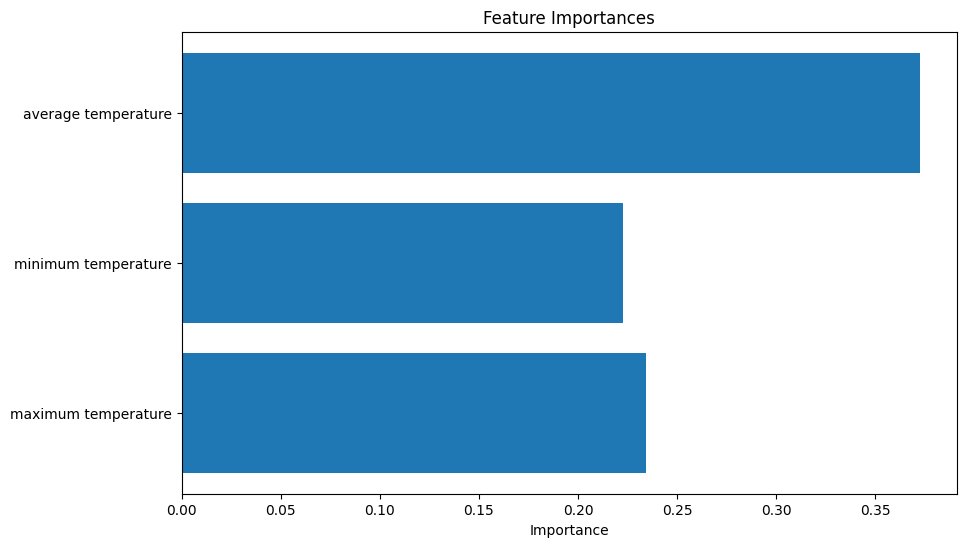

In [367]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importances = clf.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X_weather.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
selected_features = ['maximum temperature', 'minimum temperature', 'average temperature','month']
filtered_feature_importance_df = feature_importance_df[feature_importance_df['Feature'].isin(selected_features)]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(filtered_feature_importance_df['Feature'], filtered_feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [368]:
data_crime = pd.read_csv("C:/Users/ayush/Downloads/NYPD_Complaint_Data_Historic.csv/NYPD_Complaint_Data_Historic.csv")
#data.dropna(inplace=True)
data_crime.shape
#print(data)
data_crime.dtypes
#data_crime.head()

C:\Users\ayush\AppData\Local\Temp\ipykernel_10952\1948829726.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data_crime = pd.read_csv("C:/Users/ayush/Downloads/NYPD_Complaint_Data_Historic.csv/NYPD_Complaint_Data_Historic.csv")


CMPLNT_NUM             int64
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
CMPLNT_TO_DT          object
CMPLNT_TO_TM          object
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
PD_CD                float64
PD_DESC               object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
JURIS_DESC            object
BORO_NM               object
ADDR_PCT_CD          float64
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
PARKS_NM              object
HADEVELOPT            object
X_COORD_CD           float64
Y_COORD_CD           float64
Latitude             float64
Longitude            float64
Lat_Lon               object
dtype: object

In [369]:
# Data Preprocessing
data_crime = data_crime.dropna()
data_crime['CMPLNT_FR_DT'] = pd.to_datetime(data_crime['CMPLNT_FR_DT'],errors='coerce')
data_crime['month'] = data_crime['CMPLNT_FR_DT'].dt.month

# Feature Engineering
features = ['month', 'KY_CD', 'PD_CD', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude']
X_crime = pd.get_dummies(data_crime[features], drop_first=True)
y_crime = data_crime['BORO_NM']

# Train-Test Split
X_crime_train, X_crime_test, y_crime_train, y_crime_test = train_test_split(X_crime, y_crime, test_size=0.2, random_state=42)

# Model Selection and Training
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_crime_train, y_crime_train)

# Model Evaluation
y_pred = clf.predict(X_crime_test)
print('Accuracy:', accuracy_score(y_crime_test, y_pred))
print('Classification Report:\n', classification_report(y_crime_test, y_pred))

# Predict the Borough for a new instance (replace 'new_instance' with actual feature values)
#new_instance = pd.DataFrame({'month': [8], 'KY_CD': [101], 'PD_CD': [567], 'LAW_CAT_CD': ['FELONY'], 'LOC_OF_OCCUR_DESC': ['INSIDE'], 'PREM_TYP_DESC': ['RESIDENCE'], 'X_COORD_CD': [123456], 'Y_COORD_CD': [789012], 'Latitude': [40.7123], 'Longitude': [-74.0059]})
#predicted_borough = clf.predict(pd.get_dummies(new_instance))[0]
#print('Predicted Borough:', predicted_borough)

# Identify Months with Most Crime
most_crime_months = data_crime['month'].value_counts().idxmax()
print('Month with Most Crime:', most_crime_months)

Accuracy: 0.9565217391304348
Classification Report:
               precision    recall  f1-score   support

       BRONX       0.89      1.00      0.94         8
    BROOKLYN       1.00      1.00      1.00        11
   MANHATTAN       1.00      1.00      1.00         3
      QUEENS       0.00      0.00      0.00         1

    accuracy                           0.96        23
   macro avg       0.72      0.75      0.74        23
weighted avg       0.92      0.96      0.94        23

Month with Most Crime: 8


c:\Users\ayush\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ayush\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ayush\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

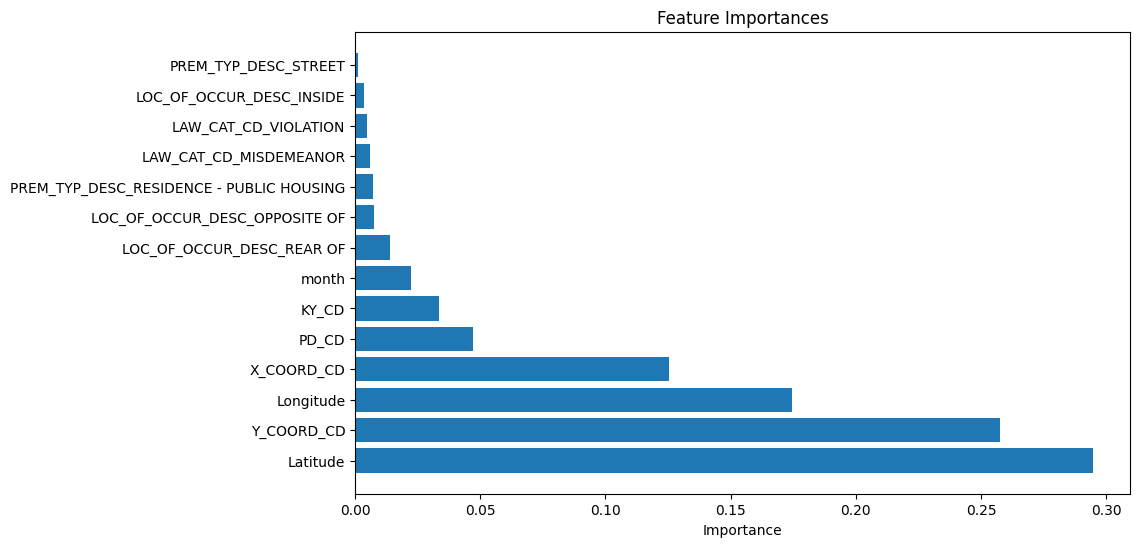

In [370]:
# Get feature importances from the trained model
feature_importances = clf.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X_crime_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()
